# Suport Vector Regression Model

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [45]:
df=pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### data cleaning

In [46]:
df.dropna()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### data Visualization

<Axes: >

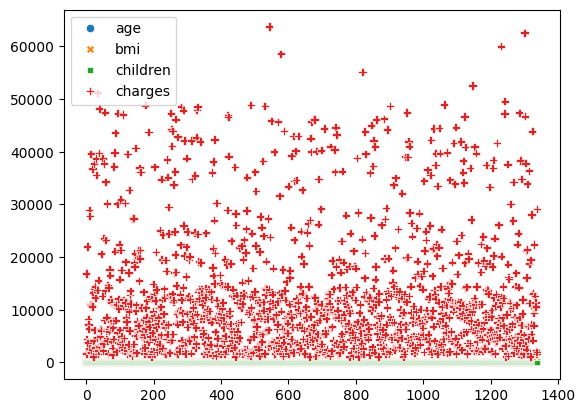

In [47]:
sns.scatterplot(data=df)

## Feature Engineering

In [48]:
Male=pd.get_dummies(df['sex'] ,drop_first=True)
df=pd.concat([df,Male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [49]:
Region=pd.get_dummies(df['region'] ,drop_first=True)
df=pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0


In [50]:
Smoker=pd.get_dummies(df['smoker'] ,drop_first=True)
df=pd.concat([df,Smoker],axis=1)
df.rename(columns={'yes':'Smoker'},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0


## Exploatory Data Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_4016\4028249495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='GnBu')


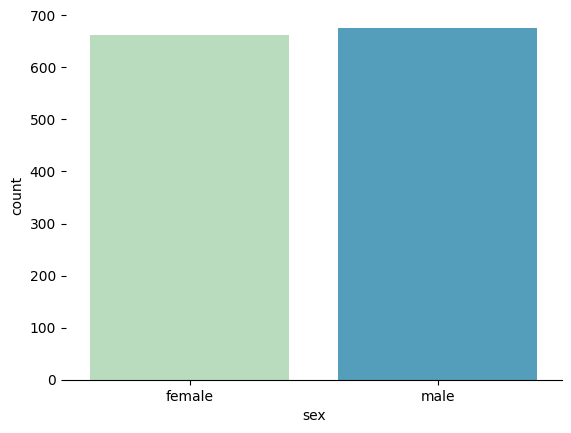

In [51]:
# Distribution Of Sex
sns.countplot(x='sex',data=df,palette='GnBu')
sns.despine(left=True)

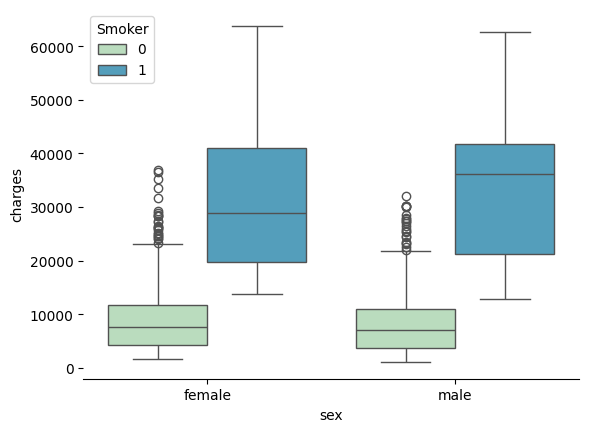

In [52]:
# replatopnship of gender and smoking
sns.boxplot(x='sex',y='charges',data=df,palette='GnBu',hue='Smoker')
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

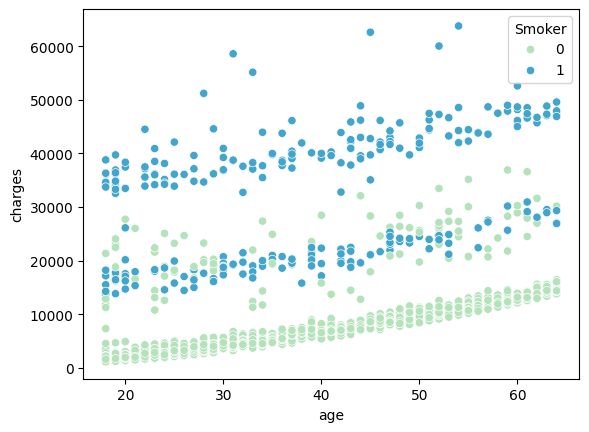

In [53]:
sns.scatterplot(x='age',y='charges',data=df,palette='GnBu',hue='Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

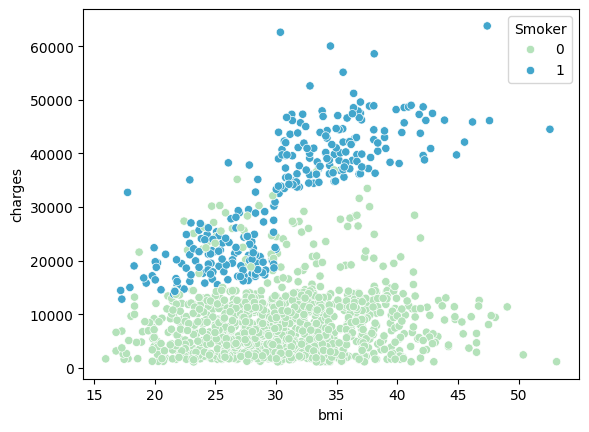

In [54]:
sns.scatterplot(x='bmi',y='charges',data=df,palette='GnBu',hue='Smoker')

<Axes: xlabel='region', ylabel='charges'>

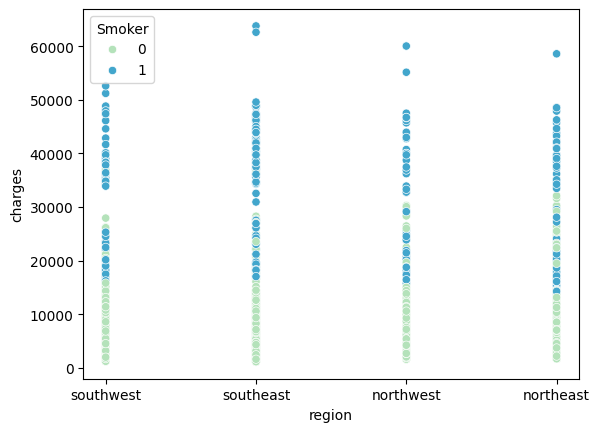

In [55]:
sns.scatterplot(x='region',y='charges',data=df,palette='GnBu',hue='Smoker')

In [56]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

,age,bmi,children,charges,male,northwest,southeast,southwest,Smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.000407,-0.011642,0.010016,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,-0.135996,0.270025,-0.006205,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.024806,-0.023066,0.021914,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.039905,0.073982,-0.043210,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,-0.011156,0.017117,-0.004184,0.076185
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,1.000000,-0.346265,-0.320829,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,-0.346265,1.000000,-0.346265,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.320829,-0.346265,1.000000,-0.036945
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.036945,0.068498,-0.036945,1.000000


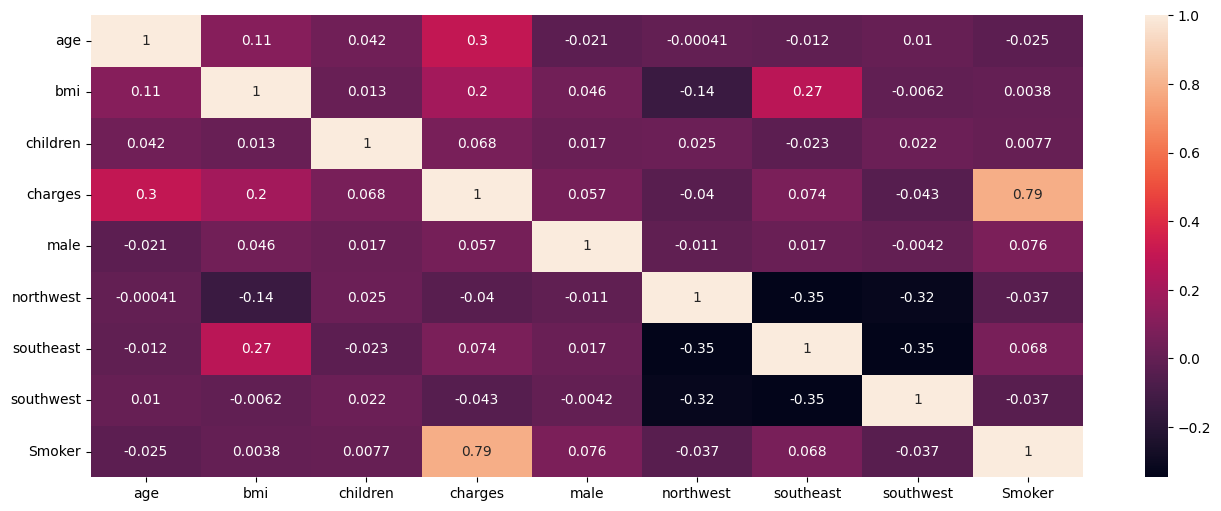

In [57]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)
df.corr()

## Splitting data

In [58]:
x=df.drop('charges',axis=1)
y=df['charges']
y[:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
x_tarin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

### Scalling the data

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_tarin)
scaled_x_test=scaler.transform(x_tarin)

## Suport Vector Model

In [61]:
from sklearn.svm import SVR
regrssor=SVR()
regrssor.fit(scaled_x_test,y_train)
predict=regrssor.predict(scaled_x_test)
predict.shape

(802,)

In [62]:
predict[:10]

array([9292.78940567, 9311.32999949, 9304.72238516, 9242.49313761,
       9274.71691883, 9313.3524131 , 9259.20579144, 9263.42700077,
       9237.16392783, 9238.20036831])